# Brief Introduction to Reinforcement Learning

Reinforcement Learning (RL) focuses on goal-oriented learning and decision processes. In RL, an agent gains knowledge through its interactions with its surroundings. Unlike Supervised Learning, where the environment remains unchanged, RL allows for direct influence on the environment. In RL, rewards might not be immediate, prompting the agent to strategize for long-term objectives. This might involve taking actions that appear less favorable initially to achieve a more advantageous outcome later. The cycle of interaction in RL involves the agent navigating through states, taking actions, and receiving rewards. Unlike supervised learning, in RL, there's no correct answer provided, only rewards or punishments based on the agent's actions. In short, RL is a training method based on rewarding desired behaviors and punishing undesired ones while an agent interacts with its environment.


*Example:* Think of a child touching a hot stove. The child isn't told beforehand that the stove is hot and touching it is wrong. But once they touch it, the pain (negative reward) teaches them not to do it again.

### Importance of RL

RL is crucial because it mimics how living beings learn from their environment, making it a bridge between artificial intelligence and biological learning.

*   Real-world applications: robotics (learning to walk), games (like AlphaGo or Chess), recommendation systems, and finance.
*   Power of adaptation: RL agents can adapt and learn from new situations they haven't been explicitly trained on.

Further reading: [Link 1](https://www.geeksforgeeks.org/what-is-reinforcement-learning/), [Link 2](https://www.turing.com/kb/reinforcement-learning-algorithms-types-examples)

### An Overview of Diverse Reinforcement Learning Algorithms

Reinforcement learning offers a vast array of algorithms, each equipped with distinct methodologies to explore and adapt to their surroundings. Instead of being a singular approach, reinforcement learning embraces a variety of strategies to address diverse challenges. Some of the most notable algorithms include Temporal Difference Learning (TDL), Q-learning, Deep Q Networks (DQN), Policy Gradients, and Proximal Policy Optimization (PPO). These algorithms stand out due to their unique exploration strategies and problem-solving techniques.

- **Temporal Difference Learning (TDL)**: A foundational RL method that combines learning from immediate rewards (like in model-free methods) with learning from future estimated rewards to continuously update value predictions.
  
- **Q-learning**: A model-free algorithm that estimates the optimal action-values iteratively by using the Bellman equation. It aims to find the action that maximizes the expected value of the total reward over any and all successive steps.
  
- **Deep Q Networks (DQN)**: An extension of Q-learning, DQN utilizes neural networks to approximate the Q-values. It brought about a revolution in RL by solving problems with large state spaces, like playing Atari games.
  
- **Policy Gradients**: A method that directly optimizes the policy function instead of value function by computing the gradient ascent. This approach is particularly useful for continuous action spaces.
  
- **Proximal Policy Optimization (PPO)**: An optimization algorithm for policy gradient methods. PPO attempts to maintain the benefits of policy gradient methods while ensuring the updates are not too large, thus improving stability and performance.

Each of these algorithms offers unique advantages tailored for different problem scenarios in the vast landscape of reinforcement learning.

Further reading: [Link 1](https://smartlabai.medium.com/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc)

## Interplay of Agent, Reward, and Environment; The Triad of RL

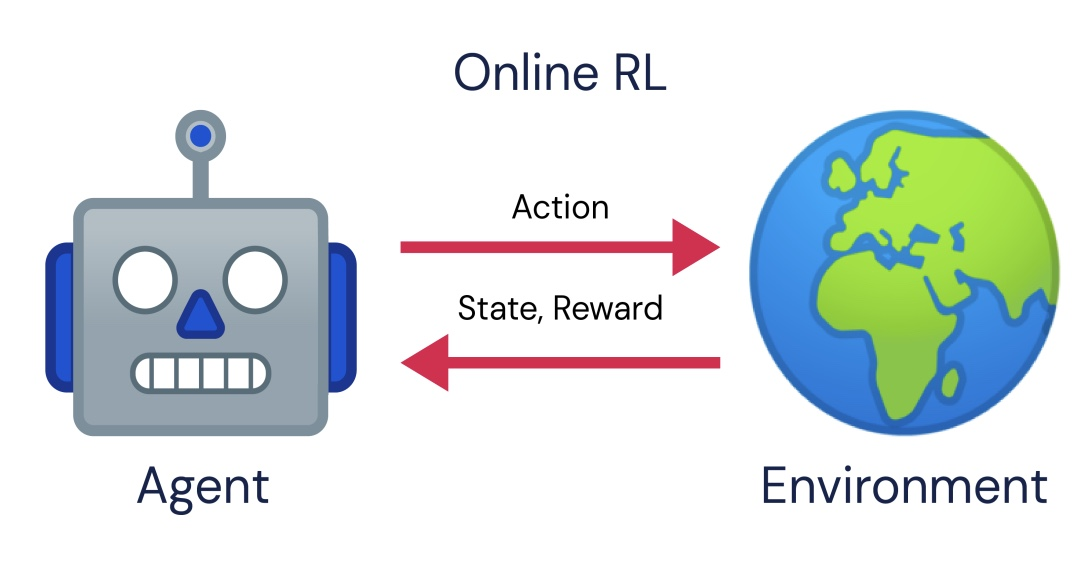
*image courtesy: https://www.deepmind.com/*


Let us unravel the continuous loop of action, feedback, and learning that forms the heart of Reinforcement Learning. RL hinges on the dynamic interplay between three primary components:

Agent: The decision-maker that interacts with the environment.

Environment: The external system that the agent interacts with.

Reward: The feedback mechanism that drives the agent's learning.

Imagine teaching a pet a new trick. You (or the training method) act as the agent, the pet in its surroundings is the environment, and the treats or scolding serve as rewards or penalties.



### Interactive Demonstration: RL in Action
Let's understand this interplay better with a simple piece of code. Run the following code and observe how the agent's actions affect the environment and how the agent learns from the rewards.

In [ ]:
class Environment:
    def __init__(self):
        self.state = "hungry"

    def step(self, action):
        if self.state == "hungry" and action == "feed":
            self.state = "satisfied"
            return "satisfied", 10  # state and reward
        elif self.state == "satisfied" and action == "feed":
            self.state = "full"
            return "full", -5
        else:
            return self.state, -1

class Agent:
    def __init__(self):
        self.value_table = {"hungry": 0, "satisfied": 0, "full": 0}

    def decide(self, state):
        # A simple decision mechanism for illustration
        if state == "hungry":
            return "feed"
        elif state == "satisfied" and self.value_table["satisfied"] < 5:
            return "feed"
        else:
            return "do_nothing"

    def learn(self, state, reward):
        # Update values based on reward
        self.value_table[state] += reward

# Interaction loop
env = Environment()
agent = Agent()

for _ in range(5):
    current_state = env.state
    action = "TODO"
    new_state, reward = "TODO"

    # Update the value based on the reward
    "TODO"

    print(f"Agent action: {action}, New State: {new_state}, Reward: {reward}")


Agent action: feed, New State: satisfied, Reward: 10
Agent action: do_nothing, New State: satisfied, Reward: -1
Agent action: do_nothing, New State: satisfied, Reward: -1
Agent action: do_nothing, New State: satisfied, Reward: -1
Agent action: do_nothing, New State: satisfied, Reward: -1


#### Think & Reflect:

1. What might happen if the negative reward for overfeeding was more severe?
2. How could the agent's decision mechanism be improved to prevent overfeeding?
3. Modify the reward values, agent's decision-making logic, or other parameters in the code to see how the agent's interactions evolve.

Keep in mind that the code provided in the demonstration isn't a standard reinforcement learning algorithm. Instead, it's a simplified and illustrative example meant to help visualize and understand the basic dynamics of reinforcement learning: interaction between the agent and the environment and how rewards influence agent behavior.

The agent uses a very rudimentary decision mechanism based on the state, and it updates its "value table" directly based on the received reward without considering future expected rewards. The purpose of the code is to showcase the concept rather than provide a practical RL solution.

### Discussion:
By observing the output, you'll notice that:

1. Initially, the agent feeds the environment (which we can think of as a pet) when it's hungry, receiving a positive reward.
2. However, continuous feeding leads the pet to become full, after which feeding results in a negative reward.
3. The agent's learning process uses these rewards to update its understanding of what actions to take in different states.

The balance between taking actions and learning from their outcomes is the essence of RL.

# Temporal Difference Learning:

Temporal Difference (TD) Learning is a central model in the realm of reinforcement learning. At its core, TD Learning seeks to correct predictions using a mixture of actual observed outcomes and future predictions. This bridges the divide between waiting until a definitive outcome is known (like in Monte Carlo methods) and making predictions based purely on models.

The fundamental equation for TD error (or the Reward Prediction Error, RPE) is:

$$
\text{RPE} = \text{reward} + \gamma \times \text{Value of Next State} - \text{Value of Current State}
$$


This equation signifies the difference between the TD target which is observed reward plus the discounted value of the next state, and what was predicted or expected. Note that the TD target is post-hoc (after observing the reward) estimate of the value of the current state on the current trial. The agent then updates its estimate of the value of the current state towards this target, by an amount determined by the learning rate.
In essence, it corrects the agent's expectations based on the outcomes and predictions as it interacts with the environment.


The TD learning equation is:

$$ V(s_t) \leftarrow V(s_t) + \alpha [ r_{t+1} + \gamma V(s_{t+1}) - V(s_t) ] $$

$V(s_t)$ is the current value estimate of state $s_t$

$α$ is the learning rate.

$r_{t+1}$ is the reward received after transitioning from state $s_t$ to state $s_{t+1}$

$γ$ is the discount factor.

$V(s_{t+1}​)$ is the value estimate of state $s_{t+1}$

In this equation, the term inside the square brackets is essentially the RPE. The TD update equation, therefore, uses the RPE to adjust the value estimate of the current state in the direction of the reward plus the discounted value of the next state.

In essence, the RPE equation calculates the prediction error, while the TD learning equation uses that error to update the agent's value estimates.


## Temporal Difference Model and Classical Conditioning

### Classical Conditioning: A Recap

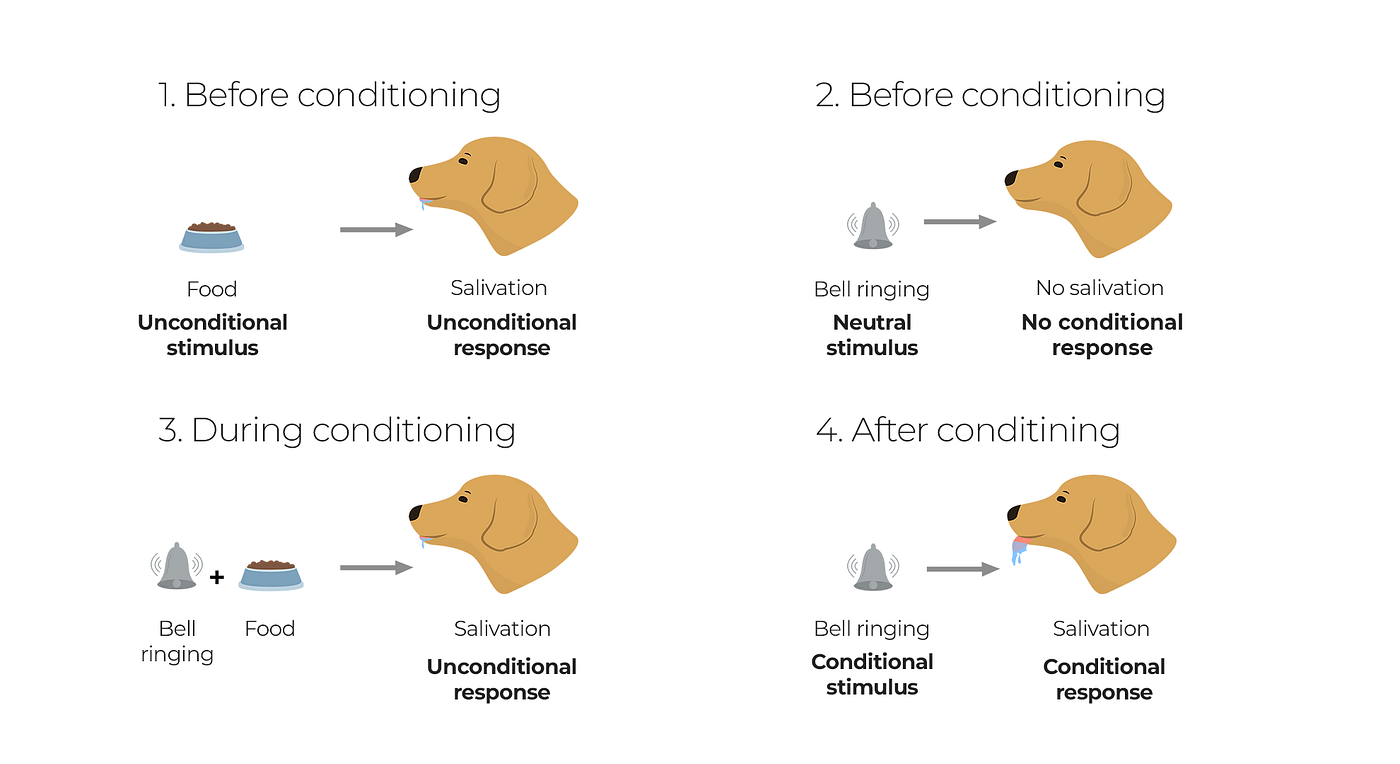
*Image courtesy: towardsdatascience.com*

Classical conditioning, also known as Pavlovian or respondent conditioning, is a learning process in which an innate response to a potent stimulus comes to be evoked in response to a previously neutral stimulus; this is achieved by repeated pairings of the neutral stimulus with the potent stimulus. A famous example is Pavlov's experiment with dogs, where the sound of a bell (previously neutral stimulus) was paired with the presentation of food (potent stimulus) until the bell alone could make the dogs salivate.

### Temporal Difference Model in the Context of Classical Conditioning

Temporal Difference (TD) learning has been proposed as a computational model that can account for many aspects of classical conditioning. At its core, TD learning is about prediction: given a certain stimulus or context, what reward can be expected? Over repeated pairings of stimuli and rewards, the TD error (the difference between predicted and actual rewards) helps adjust these predictions.

In the context of classical conditioning, TD models suggest that organisms are continually updating their predictions about future rewards. Initially, the neutral stimulus (like the bell for Pavlov's dogs) does not predict the potent stimulus (like food). However, after pairings, the neutral stimulus starts to elicit expectations of the potent stimulus, producing behaviors (like salivation) even before the potent stimulus is presented. The TD error would be significant when the association is first learned (because the reward is unexpected), but over time, as the prediction gets more accurate, the TD error decreases.

### Reward-Related Learning in the Brain

Neuroscientific research has provided substantial evidence linking reward prediction errors from TD learning models to dopamine neuron firing patterns in the brain, particularly in areas like the Ventral Tegmental Area (VTA) and the Striatum.

1. **Dopamine and RPE**: Studies have shown that dopamine neurons increase their firing rates to unexpected rewards (positive prediction error) and decrease firing rates when expected rewards are omitted (negative prediction error). This dopamine signal behaves very much like the RPE in TD models.

2. **Learning and Decision Making**: This reward prediction error, signaled by dopamine, can influence synaptic plasticity, effectively changing the strengths of connections between neurons and shaping learning and future decision-making.

3. **Applications in Classical Conditioning**: In classical conditioning scenarios, when an initially neutral stimulus becomes a predictor of reward, there is an observed shift in dopamine response from the time of the actual reward to the time of the predictive stimulus. This aligns well with TD models where the prediction error gets adjusted over time.

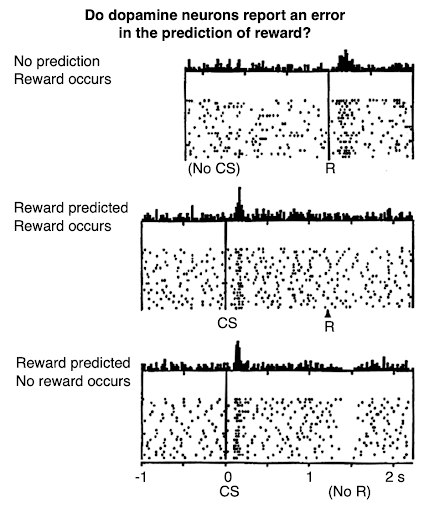

*Schultz et al., 1997*


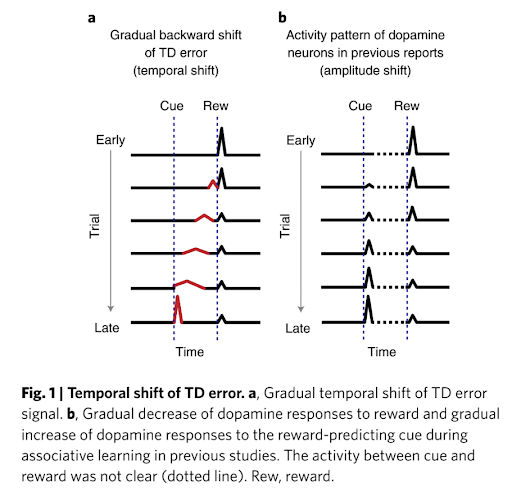

*Amo et al., 2022 — Nature Neuroscience*

In summary, TD learning, while initially a computational concept, finds resonance in biological systems. The principles of TD learning, especially the RPE, seem to mirror the workings of dopamine in the brain during reward-related learning processes, offering insights into both classical conditioning and decision-making mechanisms in the brain.

Further reading: [Link](https://towardsdatascience.com/reinforcement-learning-brain-and-psychology-part-2-classical-and-instrumental-conditioning-217a4f0a989)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configuration Parameters
gamma = 0.9  # Discount factor
alpha = 0.2  # Learning rate
num_steps = 40  # Number of timesteps in a trial
num_trials = 200  # Number of trials
cs_time = 10  # Time of the conditioned stimulus
reward_time = 35  # Time of the reward delivery
reward_amounts = 15

In [ ]:
# Initialization
V = np.zeros(num_steps)
TDE_matrix = np.zeros((num_trials, num_steps))
is_after_CS = np.zeros(num_steps, dtype=bool)
is_after_CS[cs_time:] = True  # Marking states after the CS

# TD Learning Process
for trial in range(num_trials):
    current_state = 0
    for step in range(num_steps):
        next_state = current_state + 1 if current_state < num_steps - 1 else 0
        reward = 15 if step == reward_time else 0

        # Compute TD Error based on the above equations
        TDE = "TODO"
        # Update value function based on the TD Error and if the state is after CS.
        V[current_state] += "TODO"

        TDE_matrix[trial, current_state] = TDE
        # Update state
        current_state = next_state

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(TDE_matrix, cmap='coolwarm', cbar_kws={'label': 'TD Error'})
plt.axvline(x=cs_time, color='blue', linestyle='--')
plt.axvline(x=reward_time, color='green', linestyle='--')
plt.xlabel('State')
plt.ylabel('Trial')
plt.title('Temporal Difference Errors across Trials')
plt.colorbar
plt.show()


We have now crafted a fundamental TD Learning model and observed the evolution of its state representations and reward prediction errors throughout the training process. By tweaking its environment and parameters (α, γ), you've gained insights into its operational behavior.

This streamlined model notably mirrors the behaviors observed in subjects undergoing classical conditioning tasks and also possibly reflects the functioning of dopamine neurons that might underpin such behaviors. You might have employed TD-reset or utilized the model to emulate a prevalent experimental error. The update rule deployed here has been scrutinized for over seven decades as a potential explanation for learning, both in artificial and biological contexts.

Nevertheless, there might be an element you've observed to be absent from this notebook. While we meticulously computed the Value of each state, it wasn’t actually utilized to perform any actions. Stay tuned, as the application of Values for planning Actions will be our subsequent exploration!


# Deep Reinforcement Learning and Its Neuroscientific Implications

The rise of advanced artificial intelligence (AI) is carving out novel research avenues in neuroscience. Historically, this intersection was dominated by deep neural networks, primarily trained using supervised training methods like what we have seen in our previous tutorials. However, deep reinforcement learning (deep RL), which fuses the principles of deep learning and reinforcement learning (RL), has recently emerged as a significant force. While integrating these two paradigms had been a long-term goal in AI, it's only recently that tangible results have emerged. This union has unveiled a spectrum of computational challenges and opportunities that neither framework posed independently. Many of these intricacies intriguingly parallel essential facets of brain operations, opening up a treasure trove of potential neuroscience studies. Yet, despite its promise, deep RL's implications for understanding brain functions remain largely untapped. This method provides an integrated platform for exploring the confluence of learning, representation, and decision-making, offering neuroscience a fresh set of investigative tools and a plethora of new theories.

Explore this recent insightful review article to grasp the significance of implementing Deep RL in the realm of neuroscience: [Link](https://www.sciencedirect.com/science/article/pii/S0896627320304682)


## Training neural networks with RL

When we utilize neural networks in Reinforcement Learning, we often employ backpropagation (which is a supervised learning technique) to adjust the weights. The difference comes in how we define our training targets:


*   In supervised learning, targets are provided by labeled data.
*   In reinforcement learning, targets are estimated based on rewards and future expected rewards, which might be calculated using methods like Temporal Difference Learning.


### Network Architecture:

*   Input: State or state-action pair representation.
*   Output: Predicted value (for state value function $V(s)$) or action value (for action-value function $Q(s, a)$).
*   Hidden Layers: Adequate hidden layers and units to learn the underlying patterns.

### Training:

*   Target: Computed using TD learning update rules
*   Loss Calculation: Compute a loss between the predicted value (output of the network) and the target value (computed using TD).
*   Backpropagation: Adjust network weights via backpropagation to minimize the loss.


In the following code, the model is being trained with a sort of "supervised" manner since we're using a target and backpropagation to update the weights. However, it's essentially a part of reinforcement learning because the target is derived from the reward and the predicted value of the next state, aligning with the principles of TD Learning. So, it's using principles of both supervised learning (in the training mechanism) and reinforcement learning (in deriving the targets for training) which is commonly seen in practice in the implementation of many reinforcement learning algorithms. Thus, despite superficial similarities, the origin and dynamics of training data fundamentally differentiate RL and supervised learning, encapsulating the explorative and evaluative spirit


Let's create a very simple environment: a linear world, where the agent has to move right to find a reward. It is an illustrative example and the agent should learn to predict the total expected reward (or "value") of each position in the world.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define Environment
class LinearWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = 0  # Starting position

    def step(self, action):
        # action: 0=left, 1=right
        if action == 0 and self.state > 0:
            self.state -= 1
        elif action == 1 and self.state < self.size - 1:
            self.state += 1

        reward = 1.0 if self.state == self.size - 1 else 0.0
        return self.state, reward

    def reset(self):
        self.state = 0
        return self.state

# Neural Network Model
class ValuePredictor(nn.Module):
    def __init__(self, state_dim):
        super(ValuePredictor, self).__init__()
        self.fc = nn.Linear(state_dim, 1, bias=False)

    def forward(self, state):
        return self.fc(state)

# Parameters
gamma = 0.9  # Discount factor
learning_rate = 0.1  # Learning rate
world_size = 5  # Size of the linear world
num_episodes = 100  # Training episodes
max_steps_per_episode = 10  # Maximum steps per episode

# Model and Optimizer
model = ValuePredictor(world_size)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Training Loop
env = LinearWorld(size=world_size)
value_history = []

for episode in range(num_episodes):
    state = env.reset()
    episode_values = []

    for step in range(max_steps_per_episode):
        state_one_hot = torch.eye(world_size)[state].float()

        # Randomly choose an action
        action = np.random.choice([0, 1])

        next_state, reward = env.step(action)
        next_state_one_hot = torch.eye(world_size)[next_state].float()

        value = model(state_one_hot)
        next_value = model(next_state_one_hot)

        td_target = "TODO" #observed reward plus the discounted value of the next state
        td_error = "TODO"

        # Update value estimate
        optimizer.zero_grad()
        loss = criterion(value, td_target.detach())
        loss.backward()
        optimizer.step()

        episode_values.append(value.item())
        state = next_state

    value_history.append(episode_values)

# Plotting Values
plt.figure(figsize=(10, 6))
for i, episode_values in enumerate(value_history):
    if i % 10 == 0:  # Plot every 10 episodes
        plt.plot(episode_values, label=f'Episode {i}')
plt.xlabel('State')
plt.ylabel('Estimated Value')
plt.legend()
plt.title('Estimated State Values Over Episodes')
plt.show()


Note that this is a simple, demonstrative example. More complex environments and richer state/action spaces introduce additional considerations and potentially more sophisticated models and training logic.

TD learning brought to light the importance of considering both the immediate and future rewards while updating our estimates. As we advance, it becomes imperative to operationalize this knowledge to navigate through various state-action pairs in an environment, optimizing decisions towards maximal cumulative future rewards.

Next, we expands our horizon from predicting the value of states, to quantifying the value of actions within those states, thereby crafting a pathway towards optimal policy derivation.

### Q-Learning Algorithm
In the Q-Learning algorithm the goal is to learn, by iteratively optimizing Q-Value function using the *Bellman Optimality Equation*. To achieve that, a table (Q-Table) containing all the Q-values is updated at each time step using the Q-learning iteration.

At each time step t, the agent is at a certain state and chooses an action at to perform. The environment execute the selected action and returns a reward to the agent. Higher rewards indicate  a better action (vice-versa). The environment also tells the agent whether he is done or not. So an episode can be represented as a sequence of state-action-reward.
$S_0$, $A_0$, $R_1$, $S_1$,$A_1$,$R_2$,…$S_n$, $A_n$, $R_{n+1}$


The agent’s goal is to maximize the sum of the rewards he will get from the environment, using the expected discounted return function
G$_t$ = $R_{t+1}$ + $\gamma$R$_{t+2}$ + …. = $\sum_{k=0}^{∞}γ^kR_{(t+k+1)}$
To achieve the above, the agent needs to find an optimal policy 𝛑; a stochastic distribution of a given state over actions.
Under 𝛑, the Bellman Optimality Equation is satisfied: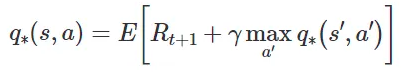

where **q** is the Action-Value/Q-Value function

### Q-Learning Implementation
To implement our algorithm, we need to define some terms and structure
-  $Q$ - Q function (defines the `quality` of an action in achieving future rewards)
-  $S_t$ - current state (observation)
-  $A_t$ - current reward
-  $R_{t+1}$ - reward received after following current action
-  $S_{t+1}$ - next state (observation)
-  $\alpha  (alpha)$ - learning rate parameter
-  $\gamma (gamma)$ - discounted factor
-  $λ (lamdha)$ - decay rate
-  $e^{-λt}$ - exponential decay constant (where t is a step within an episode)

``Q-function``
$Q(S_t,A_t) = Q(S_t,A_t) + \alpha[R_{t+1} + \gamma max_aQ(S_{t+1},a) - Q(S_t,A_t)]$



### Setting the stage
import the required libraries:
*   Gyms Library for the Frozen-lake game environment
*   Numpy for data manipulation

In [ ]:
import numpy as np
import gym


Initialize and set-up Froozen-lake environment

In [ ]:
env = gym.make("FrozenLake-v1")

# Observation and action space
state_obs_space = env.observation_space # Returns sate(observation) space of the environment.
action_space = env.action_space # Returns action space of the environment.

# Show environment description (map) as an array
print("Environment Array: ")
print(env.desc)

print("State(Observation) space:", state_obs_space)
print("Action space:", action_space)

### Lost in the jungle!
Before we venture into training agent, let's allow it to fool around its environment; taking random action at each step

In [ ]:
# Reset environment to initial state
state = env.reset()
reward = 0
# Cycle through 20 random steps
for _ in range(20):

    # Sample a random action from the entire action space
    random_action = env.action_space.sample()

    # Pass the random action into the step function
    state, reward, done, info = env.step(random_action)
    reward+=reward


    # Reset environment when done=True, i.e., when the agent falls into a Hole (H) or reaches the Goal (G)
    if done:
       state = '[TODO]'
print(reward)

### Training the Q-function to find the best policy
Using the Q-learning function, let's find the best policy for our agents

In [ ]:
# Starts by initializing Q-function parameters
alpha = 0.7   # learning rate
gamma = 0.95  # discount factor

# Training parameters
n_episodes = 10000  # number of episodes to use for training
n_max_steps = 100   # maximum number of steps per episode

# Exploration / Exploitation parameters
start_epsilon = 1.0  # start training by selecting purely random actions
min_epsilon = 0.05   # the lowest epsilon allowed to decay to
decay_rate = 0.001   # epsilon will gradually decay so we do less exploring and more exploiting as Q-function improves


In [ ]:
#set-up and initialize the Q-table
# Our Q-table is a matrix of state(observation) space x action space, i.e., 16 x 4
Qtable = np.zeros((state_obs_space.n, action_space.n))

# Show
Qtable

Let's define some useful methods. Check the inline comments for detailed explanation

In [ ]:
# This is our acting policy (epsilon-greedy), for the agent to do exploration and exploitation during training
def epsilon_greedy(Qtable, state, epsilon):
    # Generate a random number and compare to epsilon, if lower then explore, otherwise exploit
    randnum = '[TODO]'
    if randnum < epsilon:
        action = env.action_space.sample()    # explore
    else:
        action = np.argmax(Qtable[state, :])  # exploit
    return action


# This is our updating policy (greedy)
# i.e., always select the action with the highest value for that state: np.max(Qtable[next_state])
def update_Q(Qtable, state, action, reward, next_state):
    Qtable[state][action] = Qtable[state][action]*(1-alpha) + '[TODO]' #hint - the Bellman optimality equation!
    return Qtable

# This function (also greedy) will return the action from Qtable when we do evaluation
def eval_greedy(Qtable, state):
    '[TODO]'
    return action


Defining the training function


In [ ]:
def train(n_episodes, n_max_steps, start_epsilon, min_epsilon, decay_rate, Qtable):
    for episode in range(n_episodes):

        # Reset the environment at the start of each episode
        current_state = env.reset()
        t = 0
        done = False

        # Calculate epsilon value based on decay rate
        epsilon = max(min_epsilon, (start_epsilon - min_epsilon) * '[TODO]') #hint the exponential decay formula

        for t in range(n_max_steps):
            # Choose an action using previously defined epsilon greedy policy
            action = epsilon_greedy(Qtable, current_state, epsilon)

            # Perform the action in the environment, get reward and next state
            next_state, reward, done, _ = env.step(action)

            # Update Q-table
            Qtable = update_Q(Qtable, current_state, action, reward, next_state)

            # Update current state
            current_state = next_state

            # Finish the episode when done=True, i.e., reached the goal or fallen into a hole
            if done:
                break

    # Return final Q-table
    return Qtable

Now, it's time to train our agent

In [ ]:
# Train
Qtable = train(n_episodes, n_max_steps, start_epsilon, min_epsilon, decay_rate, Qtable)

# Show Q-table
Qtable

### Performance Evaluation

In [ ]:
def evaluate_agent(n_max_steps, n_eval_episodes, Qtable):
    # Initialize an empty list to store rewards for each episode
    episode_rewards=[]

    # Evaluate for each episode
    for episode in range(n_eval_episodes):

        # Reset the environment at the start of each episode
        state = env.reset()
        t = 0
        done = False
        tot_episode_reward = 0

        for t in range(n_max_steps):

            # Use greedy policy to evaluate
            action = eval_greedy(Qtable, state)

            # Pass action into step function
            next_state, reward, done, info = env.step(action)

            # Sum episode rewards
            tot_episode_reward += reward

            # Update current state
            state = next_state

            # Finish the episode when done=True, i.e., reached the goal or fallen into a hole
            if done:
                break

        episode_rewards.append(tot_episode_reward)

    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward


# Call the above evaluation function and display the results:
n_eval_episodes=1000 # evaluate over 100 episodes
mean_reward, std_reward = evaluate_agent(n_max_steps, n_eval_episodes, Qtable)
print(f"Mean Reward = {mean_reward:.2f} +/- {std_reward:.2f}")

### Limitation of Q-Learning Algorithm


## The DQN Agent

The  [DQN (Deep Q-Network) algorithm](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf) was developed by DeepMind in 2015. It was able to solve a wide range of Atari games (some to superhuman level) by combining reinforcement learning and deep neural networks at scale. The algorithm was developed by enhancing Q-Learning algorithm with deep neural networks and a technique called *experience replay*.

### Q-Learning Limitation

As seen so far, Q-Learning is based on the notion of a Q-function. The Q-function (a.k.a the state-action value function) of a policy $\pi$, $Q^{\pi}(s, a)$, measures the expected return or discounted sum of rewards obtained from state $s$ by taking action $a$ first and following policy $\pi$ thereafter. We define the optimal Q-function $Q^*(s, a)$ as the maximum return that can be obtained starting from observation $s$, taking action $a$ and following the optimal policy thereafter. The optimal Q-function obeys the following *Bellman* optimality equation:

$\begin{equation}Q^\ast(s, a) = \mathbb{E}[ r + \gamma \max_{a'} Q^\ast(s', a') ]\end{equation}$


The **basic** idea behind Q-Learning is to use the Bellman optimality equation as an iterative update $Q_{i+1}(s, a) \leftarrow \mathbb{E}\left[ r + \gamma \max_{a'} Q_{i}(s', a')\right]$, and it can be shown that this converges to the optimal $Q$-function, i.e. $Q_i \rightarrow Q^*$ as $i \rightarrow \infty$ (see the [DQN paper](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)).


For most problems, it is **impractical to represent the $Q$-function as a table** containing values for each combination of $s$ and $a$. Instead, we train a function approximator, such as a neural network with parameters $\theta$, to estimate the Q-values, i.e. $Q(s, a; \theta) \approx Q^*(s, a)$. This can done by minimizing the following loss at each step $i$:

$\begin{equation}L_i(\theta_i) = \mathbb{E}_{s, a, r, s'\sim \rho(.)} \left[ (y_i - Q(s, a; \theta_i))^2 \right]\end{equation}$ where $y_i = r +  \gamma \max_{a'} Q(s', a'; \theta_{i-1})$

Here, $y_i$ is called the TD (temporal difference) target, and $y_i - Q$ is called the TD error. $\rho$ represents the behaviour distribution, the distribution over transitions $\{s, a, r, s'\}$ collected from the environment.

Note that the parameters from the previous iteration $\theta_{i-1}$ are fixed and not updated. In practice we use a snapshot of the network parameters from a few iterations ago instead of the last iteration. This copy is called the *target network*.

Q-Learning is an *off-policy* algorithm that learns about the greedy policy $a = \max_{a} Q(s, a; \theta)$ while using a different behaviour policy for acting in the environment/collecting data. This behaviour policy is usually an $\epsilon$-greedy policy that selects the greedy action with probability $1-\epsilon$ and a random action with probability $\epsilon$ to ensure good coverage of the state-action space.



Reinforcement Learning (DQN)
=====================================
**Adapted from**: `Adam Paszke <https://github.com/apaszke>`_


**Task**

The agent has to decide between two actions - moving the cart left or
right - so that the pole attached to it stays upright. You can find an
official leaderboard with various algorithms and visualizations at the
`Gym website <https://gym.openai.com/envs/CartPole-v0>`.



As the agent observes the current state of the environment and chooses
an action, the environment *transitions* to a new state, and also
returns a reward that indicates the consequences of the action. In this
task, the environment terminates if the pole falls over too far.

The CartPole task is designed so that the inputs to the agent are 4 real
values representing the environment state (position, velocity, etc.).
However, neural networks can solve the task purely by looking at the
scene, so we'll use a patch of the screen centered on the cart as an
input. Because of this, our results aren't directly comparable to the
ones from the official leaderboard - our task is much harder.
Unfortunately this does slow down the training, because we have to
render all the frames.

Strictly speaking, we will present the state as the difference between
the current screen patch and the previous one. This will allow the agent
to take the velocity of the pole into account from one image.

**Packages**


First, let's import needed packages. Firstly, we need
`gym <https://gym.openai.com/docs>`__ for the environment
(Install using `pip install gym`).
We'll also use the following from PyTorch:

-  neural networks (``torch.nn``)
-  optimization (``torch.optim``)
-  automatic differentiation (``torch.autograd``)
-  utilities for vision tasks (``torchvision`` - `a separate
   package <https://github.com/pytorch/vision>`__).




In [ ]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T


env = gym.make(id='CartPole-v1').unwrapped

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Replay Memory
-------------

We'll be using experience replay memory for training our DQN. It stores
the transitions that the agent observes, allowing us to reuse this data
later. By sampling from it randomly, the transitions that build up a
batch are decorrelated. It has been shown that this greatly stabilizes
and improves the DQN training procedure.

For this, we're going to need two classses:

-  ``Transition`` - a named tuple representing a single transition in
   our environment
-  ``ReplayMemory`` - a cyclic buffer of bounded size that holds the
   transitions observed recently. It also implements a ``.sample()``
   method for selecting a random batch of transitions for training.




In [ ]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

Now, let's define our model. But first, let quickly recap what a DQN is.

DQN algorithm
-------------

Our environment is deterministic, so all equations presented here are
also formulated deterministically for the sake of simplicity. In the
reinforcement learning literature, they would also contain expectations
over stochastic transitions in the environment.

Our aim will be to train a policy that tries to maximize the discounted,
cumulative reward
$R_{t_0} = \sum_{t=t_0}^{\infty} \gamma^{t - t_0} r_t$, where
$R_{t_0}$ is also known as the *return*. The discount,
$\gamma$, should be a constant between $0$ and $1$
that ensures the sum converges. It makes rewards from the uncertain far
future less important for our agent than the ones in the near future
that it can be fairly confident about.

The main idea behind Q-learning is that if we had a function
$Q^*: State \times Action \rightarrow \mathbb{R}$, that could tell
us what our return would be, if we were to take an action in a given
state, then we could easily construct a policy that maximizes our
rewards:

\begin{align}\pi^*(s) = \arg\!\max_a \ Q^*(s, a)\end{align}

However, we don't know everything about the world, so we don't have
access to $Q^*$. But, since neural networks are universal function
approximators, we can simply create one and train it to resemble
$Q^*$.

For our training update rule, we'll use a fact that every $Q$
function for some policy obeys the Bellman equation:

\begin{align}Q^{\pi}(s, a) = r + \gamma Q^{\pi}(s', \pi(s'))\end{align}

The difference between the two sides of the equality is known as the
temporal difference error, $\delta$:

\begin{align}\delta = Q(s, a) - (r + \gamma \max_a Q(s', a))\end{align}

To minimise this error, we will use the `Huber
loss <https://en.wikipedia.org/wiki/Huber_loss>`__. The Huber loss acts
like the mean squared error when the error is small, but like the mean
absolute error when the error is large - this makes it more robust to
outliers when the estimates of $Q$ are very noisy. We calculate
this over a batch of transitions, $B$, sampled from the replay
memory:

\begin{align}\mathcal{L} = \frac{1}{|B|}\sum_{(s, a, s', r) \ \in \ B} \mathcal{L}(\delta)\end{align}

\begin{align}\text{where} \quad \mathcal{L}(\delta) = \begin{cases}
     \frac{1}{2}{\delta^2}  & \text{for } |\delta| \le 1, \\
     |\delta| - \frac{1}{2} & \text{otherwise.}
   \end{cases}\end{align}

Q-network
^^^^^^^^^

Our model will be a convolutional neural network that takes in the
difference between the current and previous screen patches. It has two
outputs, representing $Q(s, \mathrm{left})$ and
$Q(s, \mathrm{right})$ (where $s$ is the input to the
network). In effect, the network is trying to predict the *quality* of
taking each action given the current input.




In [ ]:
class DQN(nn.Module):

    def __init__(self):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=2)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=5, stride=2)
        self.bn3 = nn.BatchNorm2d(32)
        self.head = nn.Linear(448, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        return self.head(x.view(x.size(0), -1))

Input extraction
^^^^^^^^^^^^^^^^

The code below are utilities for extracting and processing rendered
images from the environment. It uses the ``torchvision`` package, which
makes it easy to compose image transforms. Once you run the cell it will
display an example patch that it extracted.




In [ ]:
resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])

# This is based on the code from gym.
screen_width = 600


def get_cart_location():
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART


def get_screen():
    screen = env.render(mode='rgb_array').transpose(
        (2, 0, 1))  # transpose into torch order (CHW)
    # Strip off the top and bottom of the screen
    screen = screen[:, 160:320]
    view_width = 320
    cart_location = get_cart_location()
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescare, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)


env.reset()
plt.figure()
plt.imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title('Example extracted screen')
plt.show()

Training
--------

**Hyperparameters and utilities**

This cell instantiates our model and its optimizer, and defines some
utilities:

-  ``select_action`` - will select an action accordingly to an epsilon
   greedy policy. Simply put, we'll sometimes use our model for choosing
   the action, and sometimes we'll just sample one uniformly. The
   probability of choosing a random action will start at ``EPS_START``
   and will decay exponentially towards ``EPS_END``. ``EPS_DECAY``
   controls the rate of the decay.
-  ``plot_durations`` - a helper for plotting the durations of episodes,
   along with an average over the last 100 episodes (the measure used in
   the official evaluations). The plot will be underneath the cell
   containing the main training loop, and will update after every
   episode.




In [ ]:
BATCH_SIZE = 128
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

policy_net = DQN().to(device)
target_net = DQN().to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.RMSprop(policy_net.parameters())
memory = ReplayMemory(10000)


steps_done = 0


def select_action(state):
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * \
        math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[random.randrange(2)]], device=device, dtype=torch.long)


episode_durations = []


def plot_durations():
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

Training loop
^^^^^^^^^^^^^

Finally, the code for training our model.

Here, you can find an ``optimize_model`` function that performs a
single step of the optimization. It first samples a batch, concatenates
all the tensors into a single one, computes $Q(s_t, a_t)$ and
$V(s_{t+1}) = \max_a Q(s_{t+1}, a)$, and combines them into our
loss. By defition we set $V(s) = 0$ if $s$ is a terminal
state. We also use a target network to compute $V(s_{t+1})$ for
added stability. The target network has its weights kept frozen most of
the time, but is updated with the policy network's weights every so often.
This is usually a set number of steps but we shall use episodes for
simplicity.




In [ ]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see http://stackoverflow.com/a/19343/3343043 for
    # detailed explanation).
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.uint8)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    # Compute Huber loss
    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

Below, you can find the main training loop. At the beginning we reset
the environment and initialize the ``state`` Tensor. Then, we sample
an action, execute it, observe the next screen and the reward (always
1), and optimize our model once. When the episode ends (our model
fails), we restart the loop.

Below, `num_episodes` is set small. You should download
the notebook and run lot more epsiodes.




In [ ]:
num_episodes = 20
for i_episode in range(num_episodes):
    # Initialize the environment and state
    env.reset()
    last_screen = get_screen()
    current_screen = get_screen()
    state = current_screen - last_screen
    for t in count():
        # Select and perform an action
        action = select_action(state)
        _, reward, done, _, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)

        # Observe new state
        last_screen = current_screen
        current_screen = get_screen()
        if not done:
            next_state = current_screen - last_screen
        else:
            next_state = None

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the target network)
        optimize_model()
        if done:
            episode_durations.append(t + 1)
            plot_durations()
            break
    # Update the target network
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Complete')
env.render()
env.close()
plt.ioff()
plt.show()